In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from data_reader import read_data
from data_preprocessing import preprocess_data
from feature_extractor import extract_features

%matplotlib inline

In [2]:
# data = preprocess_data(read_data(), limit=1000000, normalize_text=True, save_file='result.cropped.1m.tsv', verbose=True)
data = preprocess_data(read_data('result.cropped.1m.tsv'))

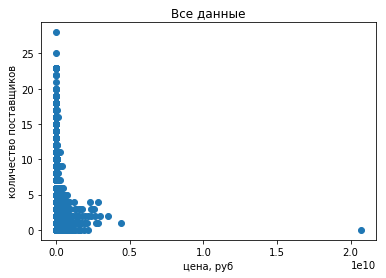

In [3]:
plt.scatter(data['RubPrice'], data['SuppliersCount'])
plt.title("Все данные")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

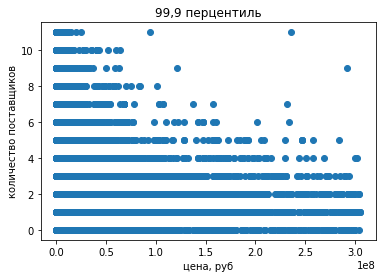

In [4]:
data_nn = data[(~np.isnan(data['RubPrice'])) & (~np.isnan(data['SuppliersCount']))]
data95 = data_nn[(data_nn['RubPrice'] < np.percentile(data_nn['RubPrice'], 99.9)) &
                 (data_nn['SuppliersCount'] < np.percentile(data_nn['SuppliersCount'], 99.9))]
plt.scatter(data95['RubPrice'], data95['SuppliersCount'])
plt.title("99,9 перцентиль")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

In [5]:
data.SuppliersCount.value_counts()

1.0     245676
2.0     206090
0.0     186692
3.0     137898
4.0      94266
5.0      57868
6.0      32789
7.0      18197
8.0       9997
9.0       5357
10.0      2604
11.0      1295
13.0       522
12.0       378
14.0       150
15.0        95
16.0        58
23.0        20
17.0        18
18.0        12
19.0         7
20.0         5
22.0         3
28.0         1
25.0         1
21.0         1
Name: SuppliersCount, dtype: int64

In [6]:
len(data['CurrencyCode'].unique())

4

In [7]:
len(data['ProcedureDisplayName'].unique())

24

In [13]:
data_unbalanced = data.head(100000)
features_unbalanced, pca_ = extract_features(data_unbalanced, use_pca=True,
                                             title_features=1000, pca_features=500, verbose=True)

oh CurrencyCode
oh ProcedureDisplayName
oh Ogrn
ng Title
ng ProcedureDisplayName
ng OrgName
[2018-11-13 13:25:22.043309]: start pca
[2018-11-13 13:26:36.208588]: end pca
354
0.9002157914909026


Text(0,0.5,'explained_variance_')

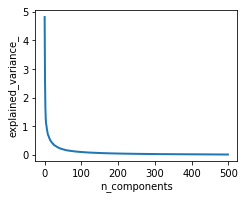

In [14]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [15]:
def ngrams(data, column):
    return data.columns[data.columns.str.startswith(f'Ngrams_{column}_')].tolist()

def onehots(data, column):
    return data.columns[data.columns.str.startswith(f'OneHot_{column}_')].tolist()

def pcas(data, column):
    return data.columns[data.columns.str.startswith(f'pca_{column}_')].tolist()

In [16]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ['RubPrice']]
y = data_unbalanced['SuppliersCount']
len(X), len(y)

(100000, 100000)

In [17]:
X_pca = features_unbalanced[pcas(features_unbalanced, 'Title') + ['RubPrice']]

In [18]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

KeyboardInterrupt: 

In [ ]:
cross_val_score(LinearRegression(), X_pca, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# from sklearn.svm import LinearSVR
# cross_val_score(LinearSVR(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# cross_val_score(RandomForestRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
X = features_unbalanced[pcas(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
X = features_unbalanced[pcas(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_absolute_error').mean()

In [ ]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
# cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
# cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
# param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
# optimizer = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=3)
# optimizer.fit(X, y)
# optimizer.best_estimator_.coef_, optimizer.best_score_

In [ ]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName') + ['RubPrice']]
# cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [19]:
g = data.groupby('SuppliersCount')
data_balanced = g.apply(lambda x: x.head(8095)).sample(frac=1).reset_index(drop=True)
data_balanced

,Unnamed: 0,index,id,Title,Uri,PublicationDateTimeUTC,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,...,StatusCode,SuppliersCount,IsWinner,ResultClass,Inn,Kpp,Name,Ogrn,ogrn1,Ogrn1
0,20310,20330,0101300015817000006,оказание услуга по предоставление статистическ...,https://zakupki.kontur.ru/0101300015817000006,2017-02-01,закупка у единственный поставщик подрядчик исп...,45702.73,45702.73,RUB,...,2.0,0.0,0.0,0.0,0207005340,NaN,АДМИНИСТРАЦИЯ МУНИЦИПАЛЬНОГО РАЙОНА БАКАЛИНСКИ...,1050200744989,1,2
1,68537,68977,0105200000217000212,на поставка лекарственный препарат,https://zakupki.kontur.ru/0105200000217000212,2017-03-17,электронный аукцион,729669.83,729669.83,RUB,...,2.0,3.0,1.0,1.0,0816029036,NaN,"БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ РЕСПУБЛИКИ КАЛМЫКИЯ ""РЕСП...",1150816000940,1,8
2,34047,34070,0102200001616002853,поставка лекарственный препарат,https://zakupki.kontur.ru/0102200001616002853,2016-05-31,электронный аукцион,280575.18,280575.18,RUB,...,2.0,2.0,0.0,0.0,0323053994,NaN,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,1020300889608,1,3
3,18660,18680,0101300002216000095,выполнение работа по определение рыночный стои...,https://zakupki.kontur.ru/0101300002216000095,2016-12-07,запрос котировка,9333.33,9333.33,RUB,...,2.0,1.0,0.0,0.0,0219006123,NaN,АДМИНИСТРАЦИЯ МУНИЦИПАЛЬНОГО РАЙОНА ГАФУРИЙСКИ...,1050201554501,1,2
4,346421,347034,0113300025717000167,электронный аукцион на поставка томатный паста...,https://zakupki.kontur.ru/0113300025717000167,2017-06-30,электронный аукцион,1330758.00,1330758.00,RUB,...,2.0,8.0,1.0,1.0,1834300420,NaN,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,1021801588995,1,18
5,41983,42007,0102200001617005153,поставка рыба свежемороженый,https://zakupki.kontur.ru/0102200001617005153,2017-12-11,электронный аукцион,744090.00,744090.00,RUB,...,2.0,2.0,1.0,1.0,0323074842,NaN,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,1020300973516,1,3
6,20247,20267,0101300014417000003,услуга интернет,https://zakupki.kontur.ru/0101300014417000003,2017-01-27,закупка у единственный поставщик подрядчик исп...,27000.00,27000.00,RUB,...,2.0,0.0,0.0,0.0,0205001439,NaN,АДМИНИСТРАЦИЯ СЕЛЬСКОГО ПОСЕЛЕНИЯ ТРЯПИНСКИЙ С...,1020201251498,1,2
7,20449,20469,0101300016717000010,приобретение жилой помещение путём участие в д...,https://zakupki.kontur.ru/0101300016717000010,2017-11-27,электронный аукцион,1663200.00,1663200.00,RUB,...,2.0,1.0,0.0,0.0,0202001293,NaN,АДМИНИСТРАЦИЯ СЕЛЬСКОГО ПОСЕЛЕНИЯ ВОЗДВИЖЕНСКИ...,1020201731318,1,2
8,335019,335632,0113300025715000315,конкурс на поставка картофель продовольственны...,https://zakupki.kontur.ru/0113300025715000315,2015-11-13,конкурс с ограниченный участие,936072.00,936072.00,RUB,...,2.0,7.0,1.0,1.0,1831063178,NaN,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,1021801144540,1,18
9,63354,63794,0104300014417000347,фрукт,https://zakupki.kontur.ru/0104300014417000347,2017-12-01,электронный аукцион,104892.00,104892.00,RUB,...,2.0,5.0,1.0,1.0,0725007606,NaN,МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧР...,1110725003080,1,7


In [21]:
features_balanced, _ = extract_features(data_balanced)
X = features_balanced[ngrams(features_balanced, 'Title') + ['RubPrice']]
y = data_balanced['SuppliersCount']

oh CurrencyCode
oh ProcedureDisplayName
oh Ogrn
ng Title
ng ProcedureDisplayName
ng OrgName


In [ ]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [ ]:
X = features_balanced[ngrams(features_balanced, 'Title') + onehots(features_balanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

In [32]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

bagging_parameters = {
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

dummy_parameters = {"base_estimator__strategy": ["mean", "median"]}

tree_parameters = {'base_estimator__max_features': ['sqrt', 'log2', None],
                   'base_estimator__max_depth': list(np.arange(3, 16, 3))}

neighbors_parameters = {'base_estimator__weights': ['uniform', 'distance'],
                        'base_estimator__n_neighbors': list(np.arange(50, 200, 50))}

svr_parameters = {'base_estimator__kernel': ['linear', 'rbf','poly'],
                  'base_estimator__C': [0.1, 1, 10]}

base_estimators = [
    (DummyRegressor(), dummy_parameters),
    (DecisionTreeRegressor(), tree_parameters),
    (SVR(gamma='scale'), svr_parameters),
    (KNeighborsRegressor(), neighbors_parameters),
]

for (estimator, estimator_parameters) in base_estimators:
    parameters = {}
    parameters.update(bagging_parameters)
    parameters.update(estimator_parameters)
    print(parameters)
    grid_search = GridSearchCV(BaggingRegressor(base_estimator=estimator),
                               parameters,
                               scoring="neg_mean_absolute_error", verbose=100, n_jobs=15)
    grid_search.fit(X, y)
    print(grid_search.best_params_)

In [45]:
# clf = BaggingRegressor(base_estimator=DummyRegressor(strategy='median'), 
#                        n_estimators=500, bootstrap = True, bootstrap_features=True,
#                        max_samples=0.5, max_features=0.5, random_state=123456)

# clf = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=14), 
#                        n_estimators=500, bootstrap = True, bootstrap_features=True,
#                        max_samples=0.5, max_features=1.0, random_state=123456)
# clf = RandomForestRegressor(n_estimators=500, verbose=True)
# clf = Ridge()
clf = Lasso()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [46]:
print("MSE: ", mean_squared_error(pred, y_test))
print("MAE: ", mean_absolute_error(pred, y_test))

MSE:  10.322658026628563
MAE:  2.6975367128105816


In [ ]:
data.head()

In [ ]:
from feature_extractor import normalize
import pandas as pd

In [ ]:
data = pd.read_csv('result.cropped.10k.tsv', sep='\t', dtype=str)
data

In [ ]:
normalize(data, ['Title'])

In [ ]:
data